# Turbulence in celestial bodies

In [1]:
#Avoid excess memory use
import dask.array as da
array = da.random.random((1000, 1000))
from astropy.io import fits

In [2]:
from turbustat.simulator import make_3dfield, make_ppv

In [3]:
from turbustat.io.sim_tools import create_fits_hdu

In [4]:
from turbustat.statistics import PowerSpectrum

In [5]:
from turbustat.statistics import StatMoments

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import astropy.units as u
from astropy.wcs import wcs

In [8]:
from astropy.utils.data import get_pkg_data_filename

In [9]:
from turbustat.simulator import make_extended
from turbustat.statistics import PDF

In [61]:
with fits.open('C:/Users/julli/Desktop/BGNR/Resources/Design4_flatrho_0021_00_radmc_centroid.fits') as hdu: data = hdu[1].data

In [62]:
header = hdu[1].header
header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  128                                                  
NAXIS2  =                  128                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                 64.0 / Pixel coordinate of reference point            
CRPIX2  =                  0.0 / Pixel coordinate of reference point            
CDELT1  = -5.2439029272473E-06 / [deg] Coordinate increment at reference point  
CDELT2  =  5.2439029272474E-06 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'             

NameError: name 'G' is not defined

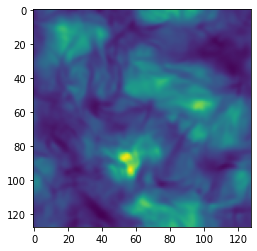

In [63]:
# Select a subsection of the image to display.
# Here we have selected a 400 x 400 pixel section
# with x = [280:680] and y = [2290:2690].
#cutout = data[2290:2690, 280:680]
 
# Create the plotting object with the WCS projection.
#plt.subplot(projection=wcs)
plt.imshow(data)
#plt.grid(ls=':', alpha=0.7)
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
 
# Save the figure.
#plt.savefig('galaxies_wcs.png')

In [64]:
#moment0 = fits.open("C:/Users/julli/Desktop/BGNR/Resources/Fiducial0_flatrho_0021_00_radmc_moment0.fits")[0]  
#pdf_mom0 = PDF(moment0, min_val=0.0, bins=None)  
#pdf_mom0.run(verbose=True) 

In [100]:
img1 = make_extended(1024, powerlaw=3.0, theta=0., ellip=1,  return_fft=False, full_fft=True, randomseed=32768324)
print(img1)
img1.size
img1.shape

[[0.31756241 0.54494802 0.63857113 ... 0.4994761  0.51687092 0.48536919]
 [0.56356306 0.42601805 0.54075945 ... 0.63503002 0.59079629 0.58034468]
 [0.63609664 0.61498016 0.59599377 ... 0.62264951 0.83473454 0.84567401]
 ...
 [0.47515603 0.40532298 0.35865825 ... 0.6863955  0.55220372 0.55571791]
 [0.34677997 0.14391113 0.31826282 ... 0.6996507  0.53045281 0.50254507]
 [0.20283654 0.40511993 0.43555304 ... 0.44419143 0.50084301 0.43643782]]


(1024, 1024)

In [78]:
img1_hdu = fits.PrimaryHDU(img1) #what is?
pixel_scale = 3 * u.arcsec
beamfwhm = 6 * u.arcsec
imshape = img1.shape
restfreq = 1.4 * u.GHz
bunit = u.K
yidhdu = create_fits_hdu(img1, pixel_scale, beamfwhm, imshape, restfreq,bunit)
#plt.imshow(yidhdu.data)  
print(yidhdu.data)

[[0.31756241 0.54494802 0.63857113 ... 0.4994761  0.51687092 0.48536919]
 [0.56356306 0.42601805 0.54075945 ... 0.63503002 0.59079629 0.58034468]
 [0.63609664 0.61498016 0.59599377 ... 0.62264951 0.83473454 0.84567401]
 ...
 [0.47515603 0.40532298 0.35865825 ... 0.6863955  0.55220372 0.55571791]
 [0.34677997 0.14391113 0.31826282 ... 0.6996507  0.53045281 0.50254507]
 [0.20283654 0.40511993 0.43555304 ... 0.44419143 0.50084301 0.43643782]]


Optimization terminated successfully.
         Current function value: 1.821697
         Iterations: 21
         Function evaluations: 43
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -9.1670e+05
Model:                     Likelihood   AIC:                         1.833e+06
Method:            Maximum Likelihood   BIC:                         1.833e+06
Date:                Fri, 02 Apr 2021                                         
Time:                        14:43:43                                         
No. Observations:              503211                                         
Df Residuals:                  503209                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

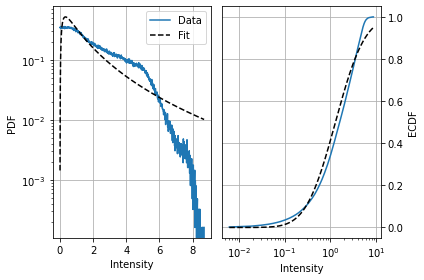

In [28]:
pdf_mom0 = PDF(yidhdu, min_val=0.0, bins=None)  
pdf_mom0.run(verbose=True, fit_type='mle')

C:\Users\julli\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Optimization terminated successfully.
         Current function value: 1.905921
         Iterations: 84
         Function evaluations: 162


C:\Users\julli\anaconda3\lib\site-packages\statsmodels\tools\numdiff.py:352: RuntimeWarning: invalid value encountered in double_scalars
  hess[i, j] = (f(*((x + ee[i, :] + ee[j, :],) + args), **kwargs)
C:\Users\julli\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -9.5908e+05
Model:                     Likelihood   AIC:                         1.918e+06
Method:            Maximum Likelihood   BIC:                         1.918e+06
Date:                Fri, 02 Apr 2021                                         
Time:                        14:44:21                                         
No. Observations:              503211                                         
Df Residuals:                  503208                                         
Df Model:                           3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
par0           1.1863        nan        nan        nan         nan         nan
par1          -1.2634        nan        nan        n

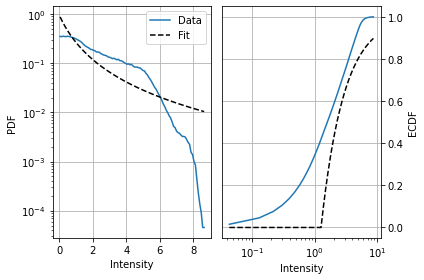

In [29]:
import scipy.stats as stats  
HDU_YD = stats.pareto.rvs(2, size=5000)  
pdf_YHDU = PDF(yidhdu, min_val=0.0, normalization_type=None, bins=100)  
pdf_YHDU.run(verbose=True, model=stats.pareto,
             fit_type='mle', floc=False)  

In [32]:
import emcee

In [ ]:
pip install corner

In [ ]:
#pip install emcee

In [81]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))

In [82]:
def lnprob(x, ivar):
    return -0.5 * np.sum(ivar * x ** 2)
ndim, nwalkers = 10, 100
ivar = 1. / np.random.rand(ndim)
p0 = [np.random.rand(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[ivar])
sampler.run_mcmc(p0, 1000)

State([[ 6.99439074e-02  3.06431202e-01  2.74644307e-01 -1.16793551e+00
  -2.54588056e-01  7.42528009e-01  1.41067147e-01 -8.49800701e-01
  -4.38399268e-01  9.00815699e-02]
 [ 1.36652638e-01 -3.22556891e-01  2.18512047e-01 -5.80446377e-01
  -4.32020335e-02 -1.02352016e+00 -1.38403989e-01  7.18303980e-01
   4.67641032e-01  1.41501792e-01]
 [ 1.22646176e-02  2.77414471e-01 -8.58637208e-01 -6.84707547e-01
  -4.62641277e-01  6.37007193e-01 -3.82800369e-01 -9.25076411e-01
   7.18946614e-03  1.13472929e-01]
 [ 5.66168507e-01  1.84234704e-01  2.62540213e-01 -4.45867476e-01
  -2.87593745e-01  1.09224200e+00 -5.44942874e-01  1.32594955e-01
   1.55488142e-01  1.18787429e-01]
 [ 8.76747648e-01  9.73143114e-01 -5.25265987e-01 -3.70576730e-01
   2.08202364e-02 -1.27680294e+00  1.64551227e-01  2.56764295e+00
  -2.13727999e-01  2.17715336e-02]
 [ 3.50191337e-01 -5.12293685e-01  2.11827308e-01 -6.95372914e-01
  -4.50645882e-01 -1.08852740e+00  9.12410746e-01  1.02111936e+00
  -4.01156532e-01 -9.278622

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

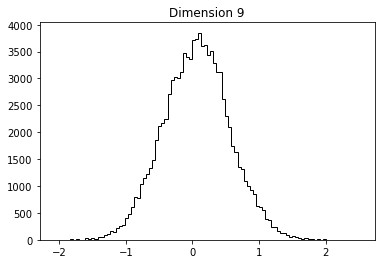

In [83]:
for i in range(ndim):
    plt.figure()
plt.hist(sampler.flatchain[:,i], 100, color="k", histtype="step")
plt.title("Dimension {0:d}".format(i))
plt.show()

In [84]:
print("Mean acceptance fraction: {0:.3f}"
.format(np.mean(sampler.acceptance_fraction)))

Mean acceptance fraction: 0.419


In [85]:
# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534
# Generate some synthetic data from the model.
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0.1+0.5*np.random.rand(N)
y = m_true*x+b_true
y += np.abs(f_true*y) * np.random.randn(N)
y += yerr * np.random.randn(N)


In [86]:
A = np.vstack((np.ones_like(x), x)).T
C = np.diag(yerr * yerr)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

In [87]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))


In [88]:
import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args=(x, y, yerr))
m_ml, b_ml, lnf_ml = result["x"]


In [89]:
def lnprior(theta):
    m, b, lnf = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < lnf < 1.0:
        return 0.0
    return -np.inf

In [90]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)


In [91]:
ndim, nwalkers = 3, 100
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [92]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))

In [ ]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
import corner
fig = corner.corner(samples, labels=["$m$", "$b$", "$\ln\,f$"],
truths=[m_true, b_true, np.log(f_true)])

In [ ]:
sampler.run_mcmc(pos, 500)

(45000, 3)

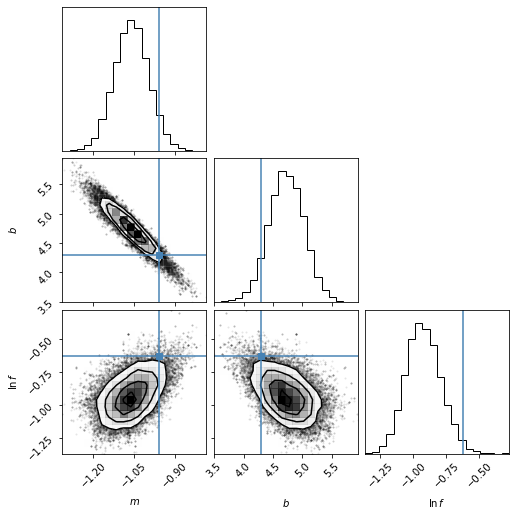

In [102]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
import corner
fig = corner.corner(samples, labels=["$m$", "$b$", "$\ln\,f$"],
truths=[m_true, b_true, np.log(f_true)])

samples.size
samples.shape

In [20]:
velocity = make_3dfield(32, powerlaw=4., amp=1.,
                        randomseed=98734) * u.km / u.s

In [21]:
density = make_3dfield(32, powerlaw=3., amp=1.,
                       randomseed=328764) * u.cm**-3  

In [22]:
density += density.std()

In [23]:
density[density.value < 0.] = 0. * u.cm**-3 

In [24]:
T = 100 * u.K

In [25]:
cube_hdu = make_ppv(velocity, density, los_axis=0,
                            vel_disp=np.std(velocity, axis=0).mean(),
                            T=T, chan_width=0.5 * u.km / u.s,
                            v_min=-20 * u.km / u.s, v_max=20 * u.km / u.s)

C:\Users\julli\anaconda3\lib\site-packages\astropy\units\quantity.py:1028: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = super().__getitem__(key)


In [26]:
from spectral_cube import SpectralCube  

cube = SpectralCube.read(cube_hdu)  

In [27]:
moments = StatMoments(cube_hdu, radius=5 * u.pix)

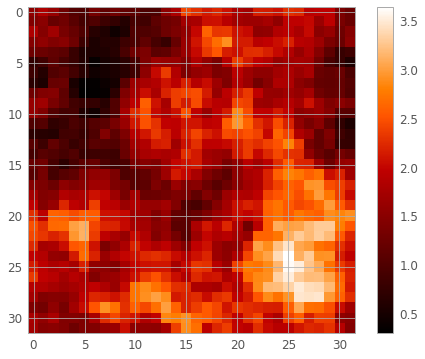

In [28]:
cube.moment0().quicklook()  

plt.colorbar()  

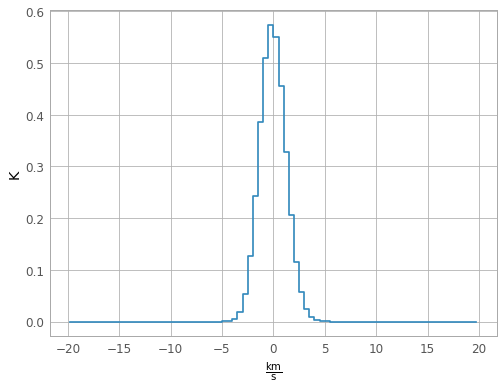

In [29]:
cube.mean(axis=(1,2)).quicklook()

In [20]:
cube_hdu.shape

(80, 32, 32)

In [21]:
from turbustat.statistics import PowerSpectrum

In [22]:
from turbustat.simulator import make_extended

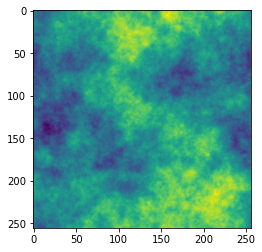

In [23]:
tank1_img = make_extended(256, powerlaw=3.)
plt.imshow(tank1_img)

In [24]:
tank12D_hdu = fits.PrimaryHDU(tank1_img)

In [25]:
pspec = PowerSpectrum(tank12D_hdu)

C:\Users\julli\anaconda3\lib\site-packages\turbustat\statistics\base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")


C:\Users\julli\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.999e+06
Date:                Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:54:50   Log-Likelihood:                 875.33
No. Observations:                 177   AIC:                            -1747.
Df Residuals:                     175   BIC:                            -1740.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2873      0.001   3925.779      0.0

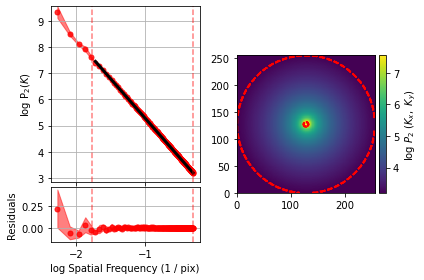

In [26]:
pspec.run(verbose=True, radial_pspec_kwargs={'binsize': 1.0},
...           fit_kwargs={'weighted_fit': True}, fit_2D=False,
...           low_cut=1. / (60 * u.pix))

In [27]:
# Another example 3-D data

In [28]:
cube = np.ones((8, 16, 16))
pixel_scale = 0.001 * u.deg
spec_pixel_scale = 1000. * u.m / u.s
beamfwhm = 0.003 * u.deg
imshape = cube.shape
restfreq = 1.4 * u.GHz
bunit = u.K
cube_hdu = create_fits_hdu(cube, pixel_scale, spec_pixel_scale, beamfwhm, imshape, restfreq, bunit)

In [29]:
#cube_hdu can now be passed to the TurbuStat statistics, or loaded into a spectral_cube.SpectralCube with SpectralCube.read(cube_hdu) 

In [30]:
# For a two-dimensional image, the FITS HDU can be made in almost the same way, minus spec_pixel_scale:

In [31]:
img = np.ones((16, 16))
imshape = img.shape
img_hdu = create_fits_hdu(img, pixel_scale, beamfwhm, imshape, restfreq, bunit)

In [32]:
#The FITS HDU can be given to TurbuStat statistics, or converted to a spectral_cube.Projection with Projection.from_hdu(img_hdu).

In [33]:
#Principal Component Analysis (PCA) is primarily a dimensionality reduction technique. Generally the data are arranged into a set of columns (representing dimensions or variables) and the set of samples is contained within each row. A covariance matrix is then constructed between each pair of columns. Performing an eigenvalue decomposition of this matrix gives an orthogonal basis for the data, the components of which are the principal components (eigenvectors). The associated eigenvalues correspond to the variance in the data described by each principal component.

In [34]:
from turbustat.statistics import PCA

In [35]:
pca = PCA(cube_hdu, distance=250. * u.pc)

In [36]:
#pca.run(verbose=True, min_eigval=1e-4, spatial_output_unit=u.pc,spectral_output_unit=u.m / u.s, brunt_beamcorrect=False)